<a href="https://colab.research.google.com/github/bork0047/Data-Analysis/blob/main/CV_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd #CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
from random import randint
# imports for array-handling and plotting
import matplotlib
import os
import tensorflow as tf
from tensorflow.python.keras.layers import Input, Dense

In [ ]:
#from subprocess import check_output
%matplotlib inline

In [ ]:
df =pd.read_csv('/content/Symbols_pixel.csv')
df.head()
df.columns
df.shape

(1919, 10001)

In [ ]:
# get the number df's columns
num_cols = df.shape[1]
# generate range of ints for suffixes
# with length exactly half that of num_cols;
# if num_cols is even, truncate concatenated list later
# to get to original list length
rng = range(1, (num_cols))
new_cols = ['p_' + str(i) for i in rng]
new_cols.append('label')
# ensure the length of the new columns list is equal to the length of df's␣columns
df.columns = new_cols[:num_cols]
df.columns

Index(['p_1', 'p_2', 'p_3', 'p_4', 'p_5', 'p_6', 'p_7', 'p_8', 'p_9', 'p_10',
       ...
       'p_9992', 'p_9993', 'p_9994', 'p_9995', 'p_9996', 'p_9997', 'p_9998',
       'p_9999', 'p_10000', 'label'],
      dtype='object', length=10001)

In [ ]:
# extract labels (all rows, and last column)
n = df.shape[1] # number of columns
labels =df['label']
features= df.iloc[:,0:n-1]
type(labels)

pandas.core.series.Series

In [ ]:
type(features)

pandas.core.frame.DataFrame

In [ ]:
features.head()

,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,...,p_9991,p_9992,p_9993,p_9994,p_9995,p_9996,p_9997,p_9998,p_9999,p_10000
0,255,255,255,255,255,255,255,255,255,255,...,255.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,255,255,255,255,255,255,255,255,255,255,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0,255.0,255.0
2,255,255,255,255,255,0,0,0,0,0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,255,255,255,255,255,255,255,255,255,255,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,255,255,255,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


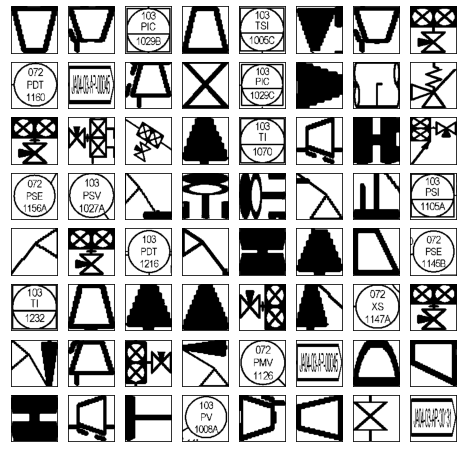

In [ ]:
fig, ax = plt.subplots(8, 8, figsize=(8, 8))
fx = features.values # returns numpy array
for i, axi in enumerate(ax.flat):
  value = randint(0, df.shape[0])
  axi.imshow(fx[value].reshape(100,100), cmap='gray')
  axi.set(xticks=[], yticks=[])
plt.show()

TypeError: ignored

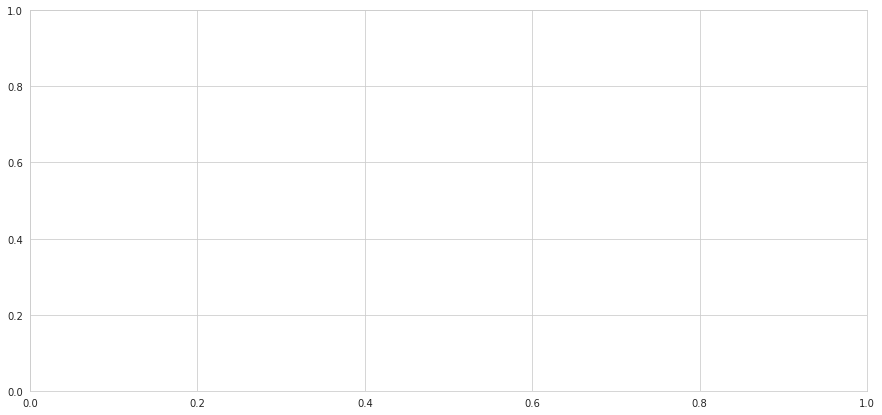

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))
plt.hist(labels,bins=39)
plt.title('Symbols Distribution')
plt.xlabel('Symbol Class')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
## check class distribution
df['label'].value_counts()

Sensor                       392
Reducer                      285
Arrowhead                    239
DB&BBV                       127
Continuity Label             116
DB&BPV                       113
Arrowhead + Triangle          83
Triangle                      74
ESDV Valve Ball               65
Flange Single T-Shape         61
Flange Joint                  46
Injector Point                43
Spectacle Blind               42
Valve                         40
DB&BBV + Valve Check          39
Valve Angle                   27
Control Valve Globe           23
Flange + Triangle             17
Control                       13
Exit to Atmosphere            12
Rupture Disc                  10
ESDV Valve Slab Gate           9
ESDV Valve Butterfly           7
Box                            7
Temporary Strainer             6
Control Valve                  5
Valve Ball                     5
Line Blindspacer               4
Deluge                         4
Control Valve Angle Choke      2
Ultrasonic

In [ ]:
df = df[~df['label'].isin(['Ultrasonic Flow Meter', 'Barred Tee','Temporary␣Strainer',
                           'Control Valve Angle Choke','Line Blindspacer',
                           'Vessel','Valve Gate Through Conduit','Deluge','Control␣Valve'])]
df['label'].value_counts()

Sensor                   392
Reducer                  285
Arrowhead                239
DB&BBV                   127
Continuity Label         116
DB&BPV                   113
Arrowhead + Triangle      83
Triangle                  74
ESDV Valve Ball           65
Flange Single T-Shape     61
Flange Joint              46
Injector Point            43
Spectacle Blind           42
Valve                     40
DB&BBV + Valve Check      39
Valve Angle               27
Control Valve Globe       23
Flange + Triangle         17
Control                   13
Exit to Atmosphere        12
Rupture Disc              10
ESDV Valve Slab Gate       9
ESDV Valve Butterfly       7
Box                        7
Temporary Strainer         6
Control Valve              5
Valve Ball                 5
Name: label, dtype: int64

In [ ]:
# labels and features (separate data frames)
# retrieve numpy array (to meet keras requirements )
dataset = df.values
# split into input (X) and output (y) variables
X = dataset[:, :-1]
y = dataset[:,-1]
print(X.shape)
print(y.shape)

(1907, 10000)
(1907,)


In [ ]:
print(f'There are {len(df.label.unique())} Unique Symbol in the dataset') #␣check number of labels

There are 28 Unique Symbol in the dataset


In [ ]:
from sklearn.model_selection import train_test_split
# simple functions to check the shapes of all compoents of the dataset (train,␣test, labels)
def data_summary(X_train, y_train, X_test, y_test):
  """Summarize current state of dataset"""
  print('Train images shape:', X_train.shape)
  print('Train labels shape:', y_train.shape)
  print('Test images shape:', X_test.shape)
  print('Test labels shape:', y_test.shape)
# split the data and check the shapes of results sets
# train_test_split(...) returns numpy arrays

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
data_summary(X_train,y_train,X_test,y_test)

Train images shape: (1525, 10000)
Train labels shape: (1525,)
Test images shape: (382, 10000)
Test labels shape: (382,)


In [ ]:
print('X_train ',X_train.shape)
print('y_train ',y_train.shape)
print('X-test ',X_test.shape)
print('y_test ',y_test.shape)

X_train = X_train.reshape(X_train.shape[0], 100,100,1)
X_test = X_test.reshape(X_test.shape[0], 100,100,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print('___ AFTER RESHAPE________')
print('X_train ',X_train.shape)
print('y_train ',y_train.shape)
print('X-test ',X_test.shape)
print('y_test ',y_test.shape)

X_train  (1525, 10000)
y_train  (1525,)
X-test  (382, 10000)
y_test  (382,)
___ AFTER RESHAPE________
X_train  (1525, 100, 100, 1)
y_train  (1525,)
X-test  (382, 100, 100, 1)
y_test  (382,)


In [ ]:
# Encode target variables
# prepare target
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
y_train_cat = y_train
y_test_cat = y_test
# prepare target
def prepare_targets(y_train, y_test):
  le = LabelEncoder()
  le.fit(y_train)
  y_train_enc = le.transform(y_train)
  y_test_enc = le.transform(y_test)
  return y_train_enc, y_test_enc

y_train, y_test = prepare_targets(y_train,y_test)

print('y_train ',y_train.shape)
print('y_test ',y_test.shape)

y_train  (1525,)
y_test  (382,)


In [ ]:
from tensorflow.keras.utils import to_categorical
import keras.utils
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
num_classes = y_test.shape[1]
print('y_train ',y_train.shape)
print('y_test ',y_test.shape)

y_train  (1525, 28)
y_test  (382, 27)


In [ ]:
# shuffle the training dataset (5 times!)
for _ in range(5):
  indexes = np.random.permutation(len(X_train))

X_train = X_train[indexes]
y_train = y_train[indexes]

# Keep 10% of the training data for validation
# cross-validation sets
val_perc = 0.10
val_count = int(val_perc * len(X_train))

# Validation set (val_data)
val_data = X_train[:val_count,:]
val_labels_cat = y_train[:val_count,:]

In [ ]:
def build_modelU():
  model = tf.keras.Sequential()
  # add Convolutional layers
  model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3),
                                   activation='relu', padding='same',
                                   input_shape=(100, 100, 1)))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                                   activation='relu', padding='same'))
  model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                                   activation='relu', padding='same'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3),
                                   activation='relu', padding='same'))
  model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3),
                                   activation='relu', padding='same'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Flatten())
# Densely connected layers
  model.add(tf.keras.layers.Dense(128, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(64, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.1))
# output layer
  model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
# compile with adam optimizer & categorical_crossentropy loss function
  model.compile(optimizer='adam', loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model
  
model = build_modelU()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 128)       7

In [ ]:
nEpochs = 25
results = model.fit(X_train, y_train,
                    epochs=nEpochs, batch_size=64,
                    validation_data=(val_data, val_labels_cat))

Epoch 1/25


ValueError: ignored

In [ ]:
history_dict = results.history
print(history_dict.keys())

NameError: ignored